In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.70MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 163kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.22MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.71MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [3]:
import torch.nn as nn
import torch.optim as optim

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # Згорткові шари
        self.conv1 = nn.Conv2d(1, 6, kernel_size=3, padding=1)
        self.pool = nn.AvgPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(16, 120, kernel_size=3, padding=1)
        # Повнозв'язаний шар
        self.fc1 = nn.Linear(120 * 7 * 7, 84)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.tanh(self.conv1(x)))  # Перший згортковий шар
        x = self.pool(torch.tanh(self.conv2(x)))  # Другий згортковий шар
        x = torch.tanh(self.conv3(x))  # Третій згортковий шар
        x = x.view(-1, 120 * 7 * 7)
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

model = LeNet5()

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print(model)

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=5880, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)


In [4]:
import torch.optim as optim
from torch.utils.data import DataLoader

def train_model(model, train_loader, val_loader, epochs=10, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)  # Передбачення класу
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss_history.append(running_loss / len(train_loader))
        train_acc_history.append(100 * correct / total)

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss_history.append(val_loss / len(val_loader))  # Втрати на валідації
        val_acc_history.append(100 * correct / total)  # Точність на валідації

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss/len(train_loader):.4f}, "
              f"Train Acc: {100*correct/total:.2f}%, Val Loss: {val_loss/len(val_loader):.4f}, "
              f"Val Acc: {100*correct/total:.2f}%")

    return train_loss_history, train_acc_history, val_loss_history, val_acc_history

In [5]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Epoch [1/10], Train Loss: 0.5415, Train Acc: 85.24%, Val Loss: 0.4220, Val Acc: 85.24%
Epoch [2/10], Train Loss: 0.4050, Train Acc: 85.20%, Val Loss: 0.3965, Val Acc: 85.20%
Epoch [3/10], Train Loss: 0.3713, Train Acc: 86.67%, Val Loss: 0.3758, Val Acc: 86.67%
Epoch [4/10], Train Loss: 0.3537, Train Acc: 86.88%, Val Loss: 0.3648, Val Acc: 86.88%
Epoch [5/10], Train Loss: 0.3388, Train Acc: 87.24%, Val Loss: 0.3539, Val Acc: 87.24%
Epoch [6/10], Train Loss: 0.3269, Train Acc: 87.76%, Val Loss: 0.3425, Val Acc: 87.76%
Epoch [7/10], Train Loss: 0.3154, Train Acc: 87.67%, Val Loss: 0.3495, Val Acc: 87.67%
Epoch [8/10], Train Loss: 0.3052, Train Acc: 87.77%, Val Loss: 0.3358, Val Acc: 87.77%
Epoch [9/10], Train Loss: 0.2985, Train Acc: 87.86%, Val Loss: 0.3319, Val Acc: 87.86%
Epoch [10/10], Train Loss: 0.2917, Train Acc: 87.97%, Val Loss: 0.3409, Val Acc: 87.97%
Test Loss: 0.3530, Test Accuracy: 87.10%


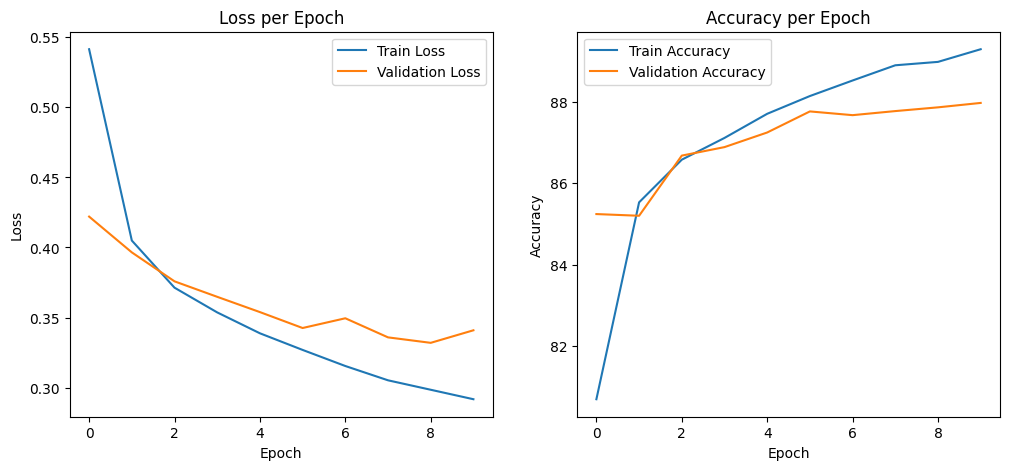

In [6]:
train_loss, train_acc, val_loss, val_acc = train_model(model, train_loader, val_loader, epochs=10, lr=0.001)

def evaluate_model(model, test_loader):
    model.eval()
    criterion = nn.CrossEntropyLoss()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss /= len(test_loader)
    test_acc = 100 * correct / total
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
    return test_loss, test_acc

test_loss, test_acc = evaluate_model(model, test_loader)

# Побудова графіків для втрат і точності
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Модель показує стабільне покращення, що є ознакою того, що вона вчиться належним чином. Тренування виглядає стабільним, і є позитивна кореляція між тренувальною та валідаційною точністю, що вказує на відсутність значного перенавчання. Зростання точності на тренувальних і валідаційних даних приблизно однакове, що вказує на хорошу здатність моделі узагальнювати на нових даних.